## Exploratory Data Analysis

In [14]:
import pandas as pd

import numpy as np
import os
import pickle
import boto3
s3 = boto3.resource('s3')
bucket_name = "msds-practicum-carey"

import re
import spacy
import scattertext as st
#nlp = spacy.load("en_core_web_sm")

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])


import nltk
from nltk import FreqDist
from nltk.util import ngrams
import string

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('outdata/tweets_clean_df.pkl', 'wb') as data:
    s3.Bucket(bucket_name).download_fileobj('tweets_clean_df.pkl', data)
    


In [3]:
tweets_clean_df = pd.read_pickle('outdata/tweets_clean_df.pkl')

In [4]:
tweets_clean_df

,tweet,class,clean_tweets
0,RT @aafb: Congrats to ⁦@RepOHalleran⁩ &amp; ⁦@...,L,congrat appointment look forward work together h
1,Great to meet the new Lake County Farm Bureau ...,L,great meet new lake county farm bureau executi...
2,Congratulations to @waynestcollege women's rug...,C,congratulation women rugby win sixth national ...
3,Great to meet with the Erickson Air Crane team...,C,great meet erickson air crane team medford tod...
4,Always wonderful to be part of the Back to Sch...,L,always wonderful part back school jam resource...
...,...,...,...
1350301,We should be upholding the National Environmen...,L,-PRON- uphold national environmental policy ac...
1350302,"If anything is to be investigated, I think we ...",C,if anything investigate -PRON- think need inve...
1350303,TODAY: Federal judge rules in favor of House R...,C,today federal judge rule favor house republica...
1350304,"In the words of an old proverb, ""A hit dog wil...",L,in word old proverb a hit dog holler


In [5]:
lib_tweets = tweets_clean_df[tweets_clean_df['class']=='L']['clean_tweets'].tolist()
con_tweets = tweets_clean_df[tweets_clean_df['class']=='C']['clean_tweets'].tolist()

### Generate Top Word Counts

In [6]:
def generate_bigrams(tweet_list):
    print(f'...Tokenizing List')
    tokens = [list(nltk.word_tokenize(x)) for x in tqdm(tweet_list)]
    print(f'...NLTK make bigrams')
    bigram_list = [list(nltk.bigrams(x)) for x in tqdm(tokens)]
    bigrams = [item for sublist in bigram_list for item in sublist]
    clean_bigram = [i for i in bigrams if i[0] != '-PRON-'if i[1] != '-PRON-']
    print(f'...making Frequency Distribution of Bigrams')
    bigram_freq_dist = nltk.FreqDist(clean_bigram)
    print(f'DONE')
    return bigram_freq_dist

def generate_trigrams(tweet_list):
    print(f'...Tokenizing ')
    tokens = [list(nltk.word_tokenize(x)) for x in tqdm(tweet_list)]
    print(f'...NLTK make Trigrams')
    trigram_list = [list(nltk.trigrams(x)) for x in tqdm(tokens)]
    trigrams = [item for sublist in trigram_list for item in sublist]
    clean_trigram = [i for i in trigrams if i[0] != '-PRON-'if i[1] != '-PRON-' if i[2] != '-PRON-']
    print(f'...making Frequency Distribution of trigrams')
    trigram_freq_dist = nltk.FreqDist(clean_trigram)
    print(f'DONE')
    return trigram_freq_dist

In [7]:
lib_bigram_freq_dist = generate_bigrams(lib_tweets)
con_bigram_freq_dist = generate_bigrams(con_tweets)

...Tokenizing List



...NLTK make bigrams



...making Frequency Distribution of Bigrams
DONE
...Tokenizing List



...NLTK make bigrams



...making Frequency Distribution of Bigrams
DONE


In [9]:
lib_trigram_freq_dist = generate_trigrams(lib_tweets)
con_trigram_freq_dist = generate_trigrams(con_tweets)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




...NLTK make Trigrams



...making Frequency Distribution of trigrams
DONE


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




...NLTK make Trigrams



...making Frequency Distribution of trigrams
DONE


## Comparison of Top Bigrams
    

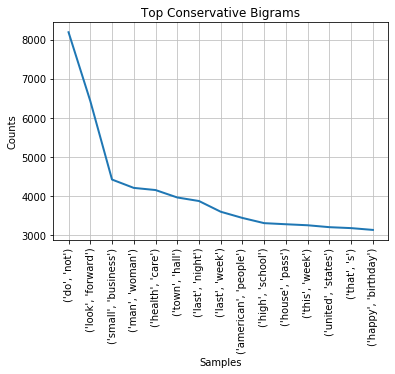

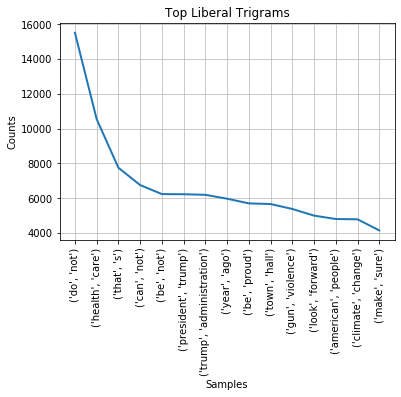

In [12]:

nltk.FreqDist.plot(con_bigram_freq_dist, 15, title="Top Conservative Bigrams")
nltk.FreqDist.plot(lib_bigram_freq_dist, 15, title="Top Liberal Trigrams")

## Comparison of Top Trigrams

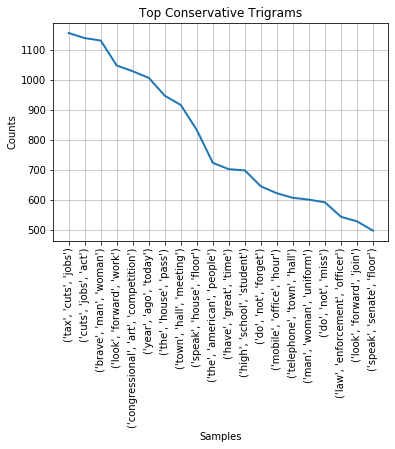

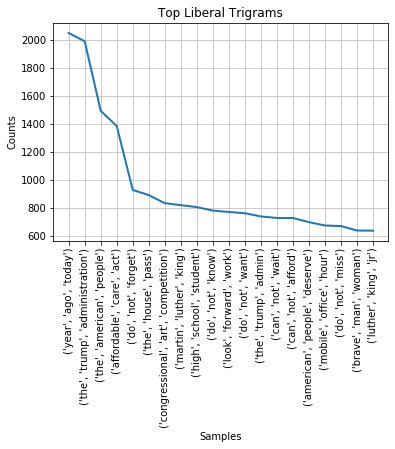

In [11]:
nltk.FreqDist.plot(con_trigram_freq_dist, 20, title="Top Conservative Trigrams")
nltk.FreqDist.plot(lib_trigram_freq_dist, 20, title="Top Liberal Trigrams")